In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
g_selfatt_source =  os.path.join(os.getcwd(), '..')
if g_selfatt_source not in sys.path:
    sys.path.append(g_selfatt_source)

In [18]:
import g_selfatt.groups as groups
import torch
import models
from g_selfatt.utils import num_params
import torch
import torchvision
from datasets import MNIST_rot
import matplotlib.pyplot as plt
import numpy as np
import models
import torch
import g_selfatt.groups as groups
import models
from torch.cuda.amp import GradScaler, autocast

In [13]:
model = models.GroupTransformer(
    group=groups.E2(num_elements=8),
    in_channels=1,
    num_channels=20,
    block_sizes=[2, 3],
    expansion_per_block=1,
    crop_per_layer=[2, 0, 2, 1, 1],
    image_size=28,
    num_classes=2,
    dropout_rate_after_maxpooling=0.0,
    maxpool_after_last_block=False,
    normalize_between_layers=False,
    patch_size=5,
    num_heads=9,
    norm_type="LayerNorm",
    activation_function="Swish",
    attention_dropout_rate=0.1,
    value_dropout_rate=0.1,
    whitening_scale=1.41421356,
)
model_path = "../saved/rotMNIST_model_p4msa_type_Local_patch_5_dpatt_0.1_dpval_0.1_activ_Swish_norm_LayerNorm_white_1.41421356_optim_Adam_lr_0.001_bs_16_ep_50_wd_0.0001_seed_0_sched_constants_schdec_1.0.pt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load(model_path, map_location=device), strict=False)

_IncompatibleKeys(missing_keys=['group._identity', 'group._elements', 'group._relative_positions', 'lifting_self_attention.row_indices', 'lifting_self_attention.col_indices', 'lifting_self_attention.group._identity', 'lifting_self_attention.group._elements', 'lifting_self_attention.group._relative_positions', 'lifting_self_attention.row_embedding.0.weight', 'lifting_self_attention.row_embedding.0.bias', 'lifting_self_attention.row_embedding.1.layer_norm.weight', 'lifting_self_attention.row_embedding.1.layer_norm.bias', 'lifting_self_attention.row_embedding.3.weight', 'lifting_self_attention.row_embedding.3.bias', 'lifting_self_attention.col_embedding.0.weight', 'lifting_self_attention.col_embedding.0.bias', 'lifting_self_attention.col_embedding.1.layer_norm.weight', 'lifting_self_attention.col_embedding.1.layer_norm.bias', 'lifting_self_attention.col_embedding.3.weight', 'lifting_self_attention.col_embedding.3.bias', 'lifting_self_attention.query.weight', 'lifting_self_attention.query.

In [33]:
data_mean = (0.1307,)
data_stddev = (0.3081,)
transform_test = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(data_mean, data_stddev),
    ]
)
test_set = MNIST_rot(root="../data", stage="test", download=True, transform=transform_test, data_fraction=1, only_3_and_8=True)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=1,
    shuffle=False,
    num_workers=4,
)

Target: 3


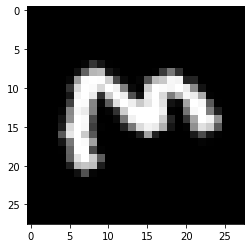

3 with probability 0.9998062252998352


In [46]:
idx_2_target = {
    0: 3,
    1: 8
}

with torch.no_grad():
    example_image, example_idx = next(iter(test_loader))
    out = model(example_image)
    example_image = example_image.squeeze()  # Batch dimension
    print(f"Target: {idx_2_target[example_idx.item()]}")
    plt.imshow(example_image.cpu().numpy(), cmap="gray")
    plt.show()
    _, preds = torch.max(out, 1)
    print(f"{idx_2_target[preds.item()]} with probability {torch.softmax(out, dim=1)[0][preds].item()}")

In [47]:
# todo visualize attention and all the different layers
# just a bunch of explainability